In [45]:
import pandas as pd
import numpy as np
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.drop(['Cabin','Ticket','Name','PassengerId'],axis='columns',inplace=True)
age_mean=df['Age'].mean()
df['Age'].fillna(age_mean,inplace=True)
df

C:\Users\adelz\AppData\Local\Temp\ipykernel_3920\1447079598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean,inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [47]:
most_frq=df['Embarked'].value_counts().idxmax()
df['Embarked'].fillna(most_frq,inplace=True)
df

C:\Users\adelz\AppData\Local\Temp\ipykernel_3920\2812406611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_frq,inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [48]:
target=df.Survived
inputs=df.drop(['Survived'],axis='columns')
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [49]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
dummies=pd.get_dummies(df['Sex']).astype(int)
dummies


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [51]:
dummies2=pd.get_dummies(inputs.Embarked).astype(int)
dummies2


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [52]:
inputs=pd.concat([inputs,dummies,dummies2],axis='columns')
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,3,male,22.000000,1,0,7.2500,S,0,1,0,0,1
1,1,female,38.000000,1,0,71.2833,C,1,0,1,0,0
2,3,female,26.000000,0,0,7.9250,S,1,0,0,0,1
3,1,female,35.000000,1,0,53.1000,S,1,0,0,0,1
4,3,male,35.000000,0,0,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,0,1,0,0,1
887,1,female,19.000000,0,0,30.0000,S,1,0,0,0,1
888,3,female,29.699118,1,2,23.4500,S,1,0,0,0,1
889,1,male,26.000000,0,0,30.0000,C,0,1,1,0,0


In [53]:
inputs.drop(['Sex','Embarked'],axis='columns',inplace=True)
inputs

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [54]:
df=inputs.join(target)
cor=df.corr()
cor

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Survived
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053,-0.338481
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.032024,-0.013855,-0.019336,-0.069809
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734,-0.035322
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.081629
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.257307
female,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.543351
male,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.543351
C,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742,0.168240
Q,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421,0.003650
S,0.074053,-0.019336,0.068734,0.060814,-0.162184,-0.119224,0.119224,-0.782742,-0.499421,1.000000,-0.149683


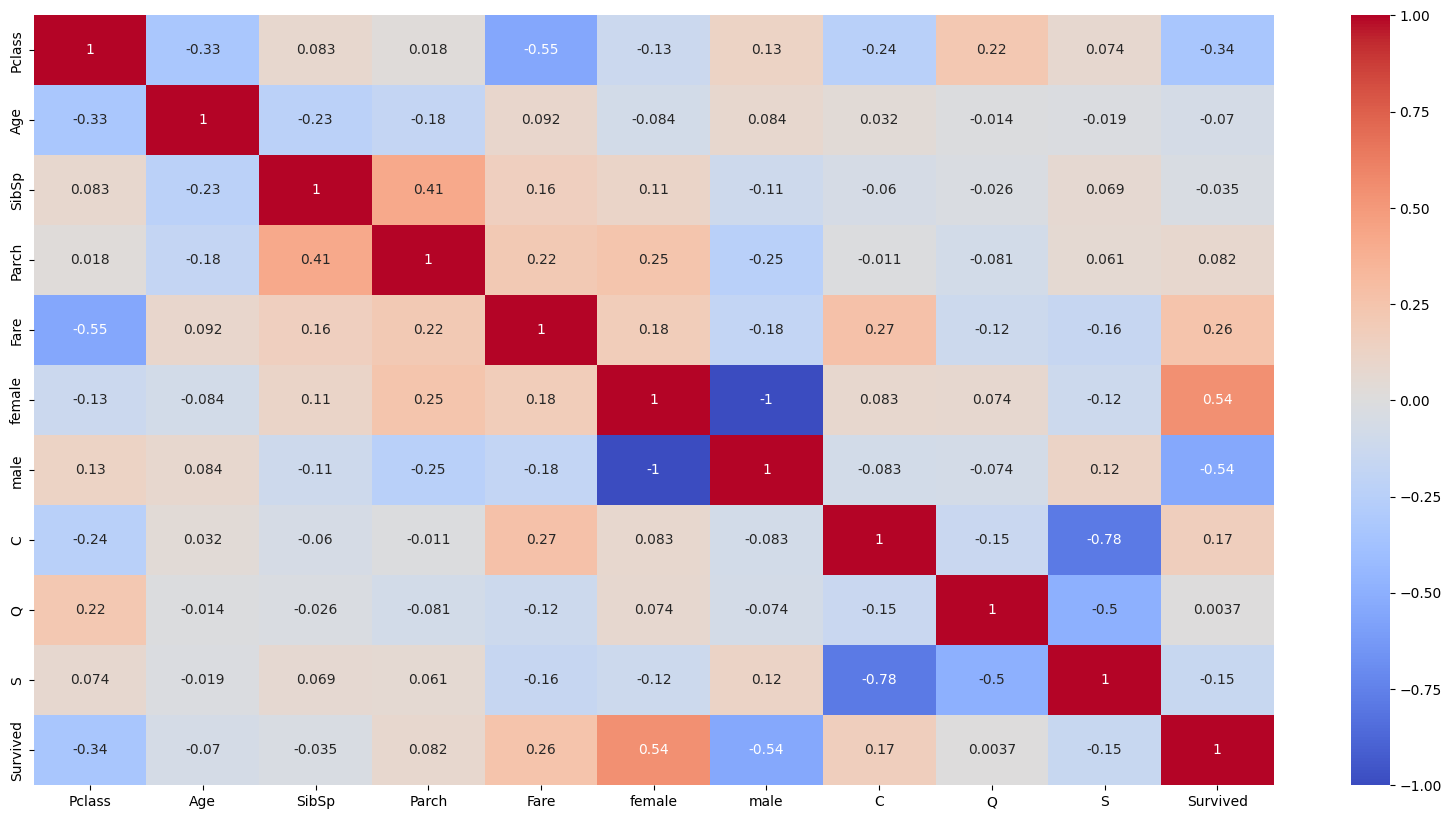

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(inputs,target,test_size=0.2)

len(X_train)

712

In [60]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [61]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [62]:
model.score(X_test,Y_test)

0.776536312849162